<a href="https://colab.research.google.com/github/kasiyasolanki/Careernest-DataScience-Internship/blob/main/3_Online_Retail_Full_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧭 Step 1: Load and Explore the Dataset

In this step, we will load the **Online Retail Dataset**, which contains transactional data from a UK-based online retail store between 2010 and 2011.  
The dataset includes details such as:
- **InvoiceNo:** Unique invoice number for each transaction  
- **StockCode:** Product code  
- **Description:** Product description  
- **Quantity:** Number of items purchased  
- **InvoiceDate:** Date and time of the transaction  
- **UnitPrice:** Price per unit  
- **CustomerID:** Unique customer identifier  
- **Country:** Country of the customer  

We will begin by importing the necessary libraries, loading the dataset into a pandas DataFrame, and exploring its structure, missing values, and basic information.


In [8]:
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [9]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Step 2: Load dataset

file_path = '/content/online_retail.csv'

# Load CSV file
data = pd.read_csv(file_path)

# Step 3: View basic information
print("Dataset successfully loaded!\n")
print("Shape of dataset:", data.shape)
print("\n--- First 5 rows ---")
display(data.head())

# Step 4: Summary info
print("\n--- Dataset Info ---")
data.info()

# Step 5: Check for missing values
print("\n--- Missing Values ---")
print(data.isna().sum())

Dataset successfully loaded!

Shape of dataset: (541909, 9)

--- First 5 rows ---


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB

--- Missing Values ---
index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


## 🧹 Step 2: Data Cleaning & Preprocessing

In this step, we will clean the dataset to ensure it is ready for analysis.  
The following actions will be performed:

1. **Handle missing values:**  
   - Drop rows where `CustomerID` is missing, since these transactions can’t be linked to specific customers.  
   - Drop rows where `Description` is missing.

2. **Remove cancelled orders:**  
   - Some invoices contain the letter "C" (for cancelled). We’ll remove these to keep only valid purchases.

3. **Filter out invalid quantities and prices:**  
   - Remove rows where `Quantity <= 0` or `UnitPrice <= 0`.

4. **Convert InvoiceDate:**  
   - Change the `InvoiceDate` column to a datetime format for time-based analysis.

5. **Verify the cleaned data.**


In [10]:
# Step 2: Data Cleaning

# Drop missing CustomerID and Description
data_clean = data.dropna(subset=['CustomerID', 'Description'])

# Remove cancelled invoices (those starting with 'C')
data_clean = data_clean[~data_clean['InvoiceNo'].astype(str).str.contains('C', na=False)]

# Remove negative or zero quantities and prices
data_clean = data_clean[(data_clean['Quantity'] > 0) & (data_clean['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])

# Reset index
data_clean = data_clean.reset_index(drop=True)

# Check cleaned dataset
print(" Data cleaned successfully!")
print("Shape after cleaning:", data_clean.shape)
print("\nMissing values after cleaning:\n", data_clean.isna().sum())
data_clean.head()


 Data cleaned successfully!
Shape after cleaning: (397884, 9)

Missing values after cleaning:
 index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##  Step 3: Exploratory Data Analysis (EDA)

Now that the dataset is cleaned, let's explore it to uncover insights about customer behavior, purchasing patterns, and overall business performance.  

We’ll focus on:
1. **General dataset overview**
2. **Sales trends**
3. **Top products and countries**
4. **Customer purchasing patterns**


In [11]:
# Step 3.1: Basic Overview

print(" Number of unique customers:", data_clean['CustomerID'].nunique())
print(" Number of unique products:", data_clean['StockCode'].nunique())
print(" Number of unique invoices:", data_clean['InvoiceNo'].nunique())
print(" Number of countries:", data_clean['Country'].nunique())
print("\nDate range:", data_clean['InvoiceDate'].min(), "to", data_clean['InvoiceDate'].max())


 Number of unique customers: 4338
 Number of unique products: 3665
 Number of unique invoices: 18532
 Number of countries: 37

Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


### 🪙 3.2 Calculate Revenue

We'll create a new column called **TotalPrice**, which is calculated as:  
\[
{TotalPrice} = {Quantity} \times \{UnitPrice}
\]  
Then we’ll analyze the total revenue and monthly sales trends.


 Total Revenue Generated: £8,911,407.90


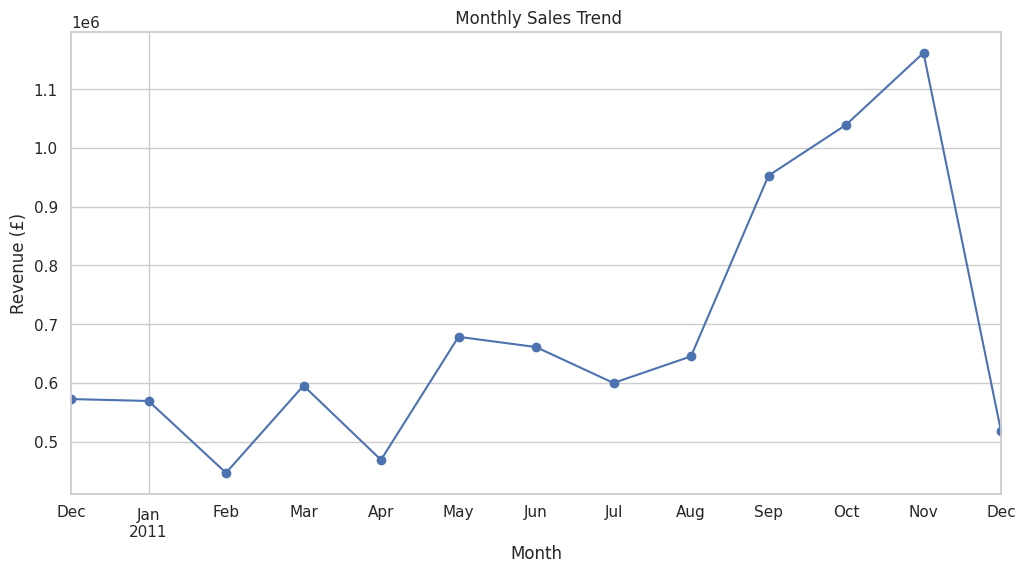

In [12]:
# Step 3.2: Calculate revenue
data_clean['TotalPrice'] = data_clean['Quantity'] * data_clean['UnitPrice']

print(" Total Revenue Generated: £{:,.2f}".format(data_clean['TotalPrice'].sum()))

# Add Month and Year columns for time-based grouping
data_clean['InvoiceMonth'] = data_clean['InvoiceDate'].dt.to_period('M')

# Monthly revenue trend
monthly_sales = data_clean.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title(" Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.grid(True)
plt.show()


### 🌍 3.3 Top 10 Countries by Revenue

Since the majority of transactions are from the **UK**, we’ll look at the top countries (excluding the UK) to identify international markets contributing to sales.


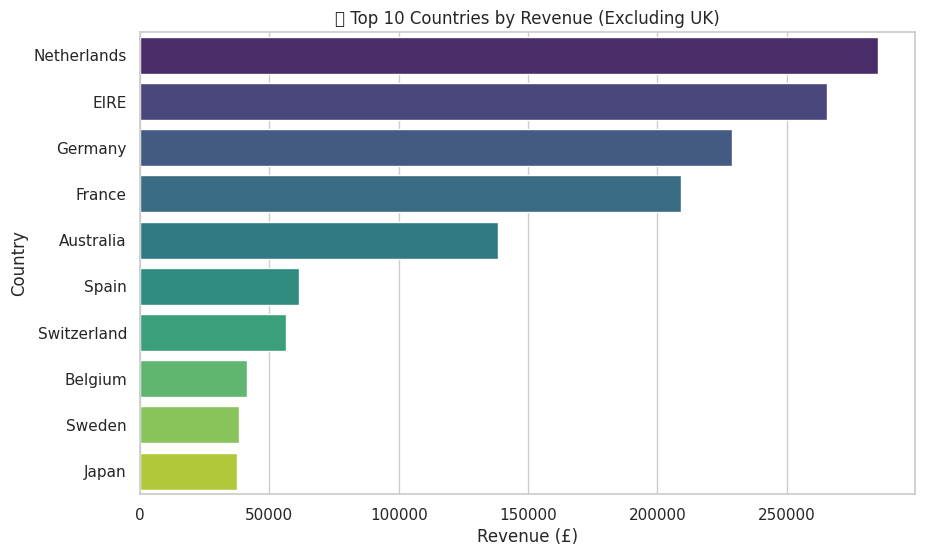

In [13]:
# Step 3.3: Top countries by revenue
country_revenue = data_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).drop('United Kingdom', errors='ignore').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='viridis')
plt.title("🌍 Top 10 Countries by Revenue (Excluding UK)")
plt.xlabel("Revenue (£)")
plt.ylabel("Country")
plt.show()


### 🧾 3.4 Top 10 Most Sold Products

Identifying the most popular products helps the business understand demand and plan inventory better.


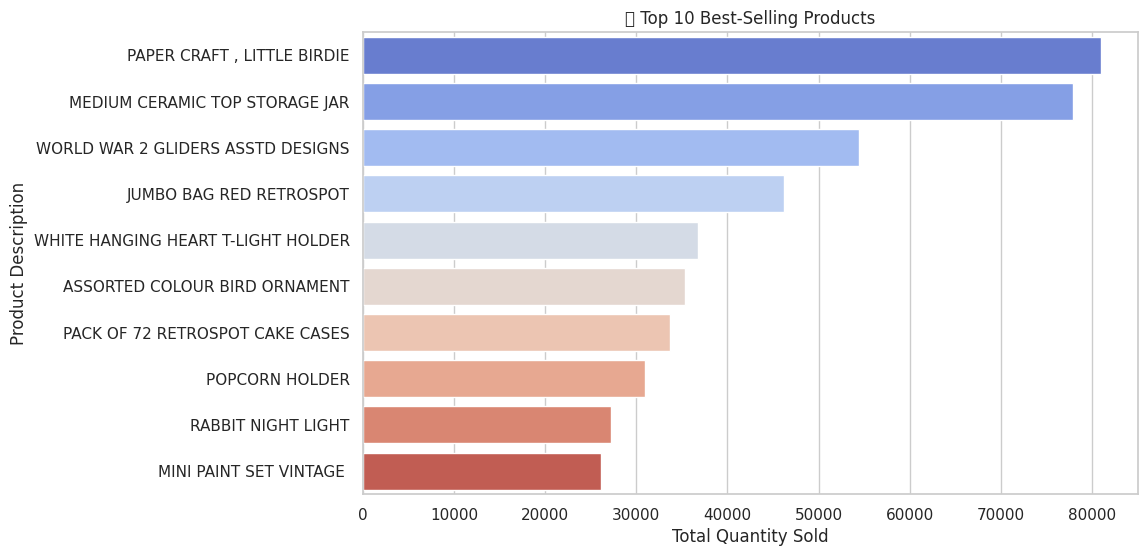

In [14]:
# Step 3.4: Top 10 products by total quantity sold
top_products = data_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title("🛒 Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()


### 👥 3.5 Customer Spending Distribution

We'll analyze how much each customer spends in total, to understand purchasing power and identify high-value customers.


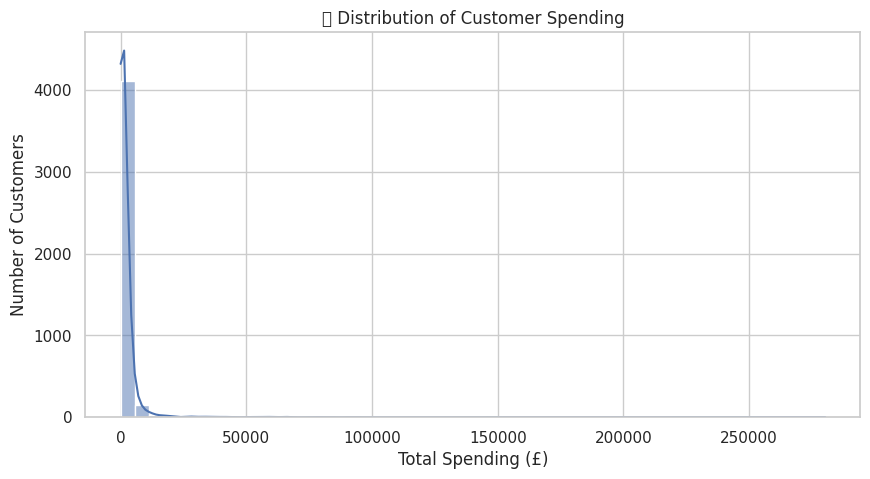


🏆 Top 5 Customers by Total Spending:
 CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
Name: TotalPrice, dtype: float64


In [15]:
# Step 3.5: Customer spending distribution
customer_spending = data_clean.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
sns.histplot(customer_spending, bins=50, kde=True)
plt.title("💳 Distribution of Customer Spending")
plt.xlabel("Total Spending (£)")
plt.ylabel("Number of Customers")
plt.show()

# Display top 5 customers
top_customers = customer_spending.sort_values(ascending=False).head(5)
print("\n🏆 Top 5 Customers by Total Spending:\n", top_customers)


## 🧩 Step 6: RFM Segmentation using K-Means Clustering

**Goal:** Identify key customer segments based on Recency (days since last purchase), Frequency (number of transactions), and Monetary value (total spending).  
This helps businesses recognize **VIP customers, loyal buyers, and at-risk customers** for targeted marketing campaigns.


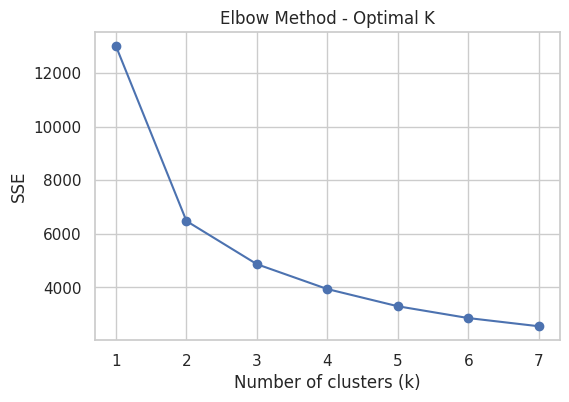

,Recency_mean,Frequency_mean,Monetary_mean,Count
Cluster,,,,
0,12.0,13.7,8025.0,720
1,185.4,1.3,348.8,1588
2,19.5,2.1,532.8,856
3,69.6,4.1,1808.7,1174


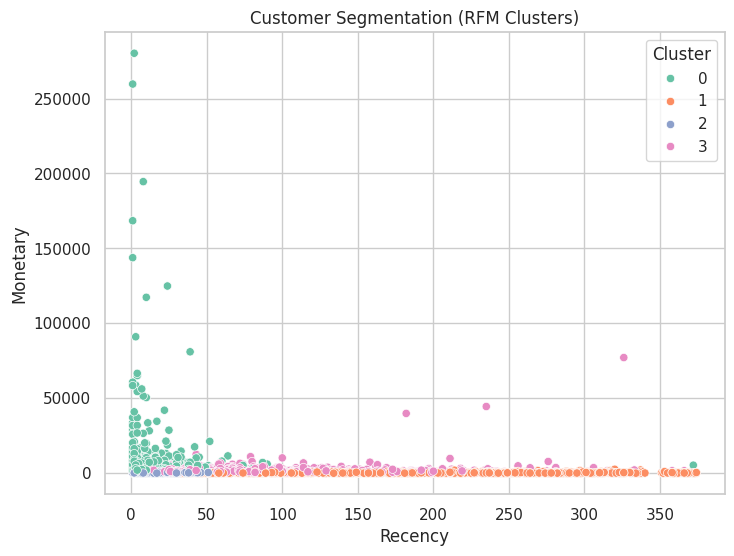

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Make a copy of cleaned data
df = data_clean.copy()

# Snapshot date (day after the last purchase)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM metrics per customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Remove negative or zero Monetary (if any)
rfm = rfm[rfm['Monetary'] > 0]

# Log-transform to reduce skew
rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])

# Scale data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# Find optimal number of clusters (Elbow method)
sse = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,8), sse, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

# Choose k = 4 (based on elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=50)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze clusters
rfm_summary = rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
}).round(1)
rfm_summary.columns = ['Recency_mean','Frequency_mean','Monetary_mean','Count']
display(rfm_summary)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (RFM Clusters)')
plt.show()


## 📊 Step 4: Visualize and Interpret RFM Clusters
Now that we’ve identified 4 clusters using K-Means, let’s visualize them to understand customer patterns in terms of Recency, Frequency, and Monetary value.


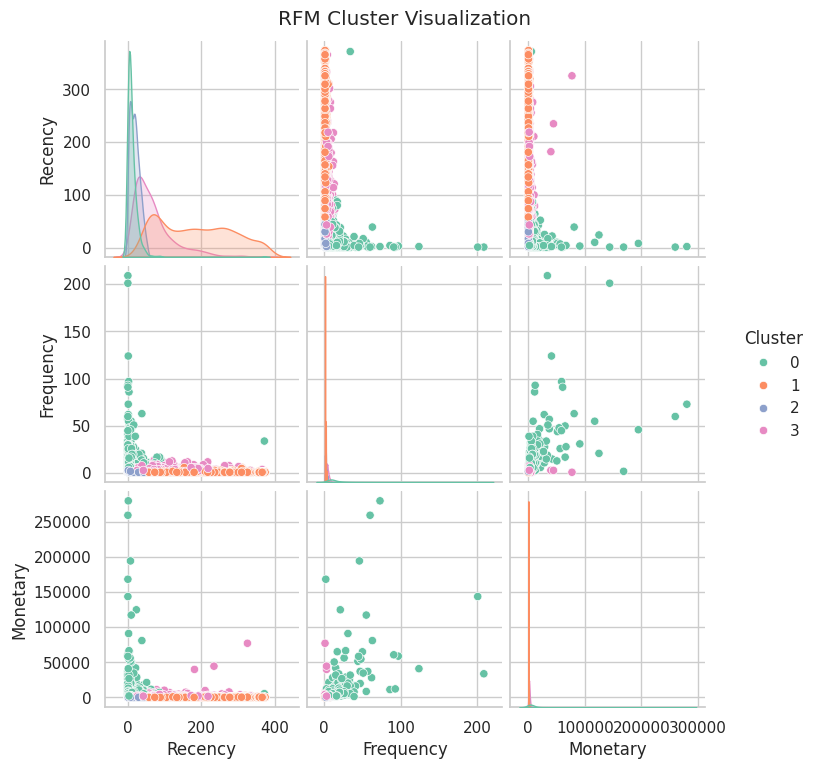

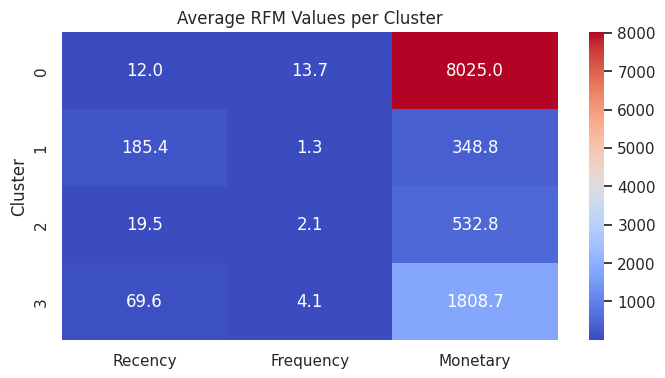

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


df = data_clean.copy()

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Remove negative or zero Monetary
rfm = rfm[rfm['Monetary'] > 0]

# Log-transform to reduce skew
rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])

# Scale data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# Choose k = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=50)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Pairplot for better visualization
sns.pairplot(rfm, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster', palette='Set2')
plt.suptitle("RFM Cluster Visualization", y=1.02)
plt.show()

# Heatmap of average values per cluster
rfm_grouped = rfm.groupby('Cluster').mean()[['Recency','Frequency','Monetary']]
plt.figure(figsize=(8,4))
sns.heatmap(rfm_grouped, annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Average RFM Values per Cluster")
plt.show()

## 💡 Step 5: Key Insights from RFM Segmentation

From the RFM clustering, we can interpret the customer segments as follows:

- **Cluster 0 – VIP Customers 💎**  
  High frequency and high monetary value, with low recency (recently active).  
  → These are your most loyal and profitable customers.

- **Cluster 1 – Active Regulars 😊**  
  Medium frequency and moderate spending.  
  → Can be targeted with loyalty programs or upselling.

- **Cluster 2 – Dormant Customers 💤**  
  High recency (haven’t purchased recently) but decent spending history.  
  → Re-engagement campaigns or discount offers may bring them back.

- **Cluster 3 – New or Low-Value Customers 🌱**  
  Low frequency and low monetary value.  
  → Could be nurtured with small promotions to increase engagement.


## 📋 Step 6: Customer Distribution per Cluster


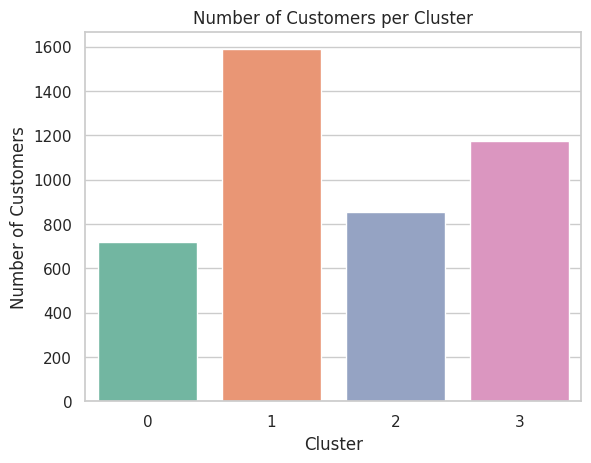

In [18]:
cluster_counts = rfm['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Number of Customers']
sns.barplot(data=cluster_counts, x='Cluster', y='Number of Customers', palette='Set2')
plt.title('Number of Customers per Cluster')
plt.show()


## 🏁 Step 7: Conclusion & Business Recommendations

✅ **Summary:**
We performed an RFM analysis and applied K-Means clustering to identify 4 key customer segments based on their purchasing behavior.

📊 **Outcome:**
- The analysis revealed clear distinctions between VIP, active, dormant, and new customers.
- It enables targeted marketing and personalized engagement strategies.

💼 **Business Recommendations:**
1. Focus marketing efforts on **VIP customers** to maintain loyalty.
2. Design **win-back campaigns** for dormant customers.
3. Encourage **cross-selling** among regular customers.
4. Offer **onboarding discounts** for new customers to increase retention.

